In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import datetime
from sklearn import metrics
import matplotlib.backends.backend_pdf as pdf_backend
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras

tensorflow.test.gpu_device_name()

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
title = "SWaT_Dataset_Attack_v0"
df = pd.read_csv("/content/drive/MyDrive/CI Project/" + title + ".csv")

In [3]:
df_attack = df[[' Timestamp', 'FIT101','LIT101','P101', 'P102', 'FIT201', 'AIT202', 'DPIT301', 'FIT301', 'FIT601', 'P501', 'PIT501', 'PIT503', 'PIT502']]
print(df_attack)

                      Timestamp    FIT101    LIT101  P101  P102    FIT201  \
0        28/12/2015 10:00:00 AM  2.427057  522.8467     2     1  2.445391   
1        28/12/2015 10:00:01 AM  2.446274  522.8860     2     1  2.445391   
2        28/12/2015 10:00:02 AM  2.489191  522.8467     2     1  2.442316   
3        28/12/2015 10:00:03 AM  2.534350  522.9645     2     1  2.442316   
4        28/12/2015 10:00:04 AM  2.569260  523.4748     2     1  2.443085   
...                         ...       ...       ...   ...   ...       ...   
449914      2/1/2016 2:59:55 PM  2.559972  519.5495     2     1  2.459488   
449915      2/1/2016 2:59:56 PM  2.549082  520.4131     2     1  2.459488   
449916      2/1/2016 2:59:57 PM  2.531467  520.6878     2     1  2.460129   
449917      2/1/2016 2:59:58 PM  2.521218  520.7271     2     1  2.460129   
449918      2/1/2016 2:59:59 PM  2.501681  521.1196     2     1  2.458206   

          AIT202   DPIT301    FIT301    FIT601  P501    PIT501    PIT503  \

In [4]:
df_attack[' Timestamp'] = pd.to_datetime(df_attack[' Timestamp'])
print(df_attack)

                 Timestamp    FIT101    LIT101  P101  P102    FIT201  \
0      2015-12-28 10:00:00  2.427057  522.8467     2     1  2.445391   
1      2015-12-28 10:00:01  2.446274  522.8860     2     1  2.445391   
2      2015-12-28 10:00:02  2.489191  522.8467     2     1  2.442316   
3      2015-12-28 10:00:03  2.534350  522.9645     2     1  2.442316   
4      2015-12-28 10:00:04  2.569260  523.4748     2     1  2.443085   
...                    ...       ...       ...   ...   ...       ...   
449914 2016-02-01 14:59:55  2.559972  519.5495     2     1  2.459488   
449915 2016-02-01 14:59:56  2.549082  520.4131     2     1  2.459488   
449916 2016-02-01 14:59:57  2.531467  520.6878     2     1  2.460129   
449917 2016-02-01 14:59:58  2.521218  520.7271     2     1  2.460129   
449918 2016-02-01 14:59:59  2.501681  521.1196     2     1  2.458206   

          AIT202   DPIT301    FIT301    FIT601  P501    PIT501    PIT503  \
0       8.396437  19.74838  2.206835  0.000128     2  250.8

<ipython-input-4-41957c7eabf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attack[' Timestamp'] = pd.to_datetime(df_attack[' Timestamp'])


In [5]:
def getTimeIndex(timeStamp):
  return df_attack[df_attack[' Timestamp'] == timeStamp].index.tolist()[0]

In [6]:
times = {
    "Type": [
        "SS-SP on P-102",
        "SS-SP on MV-504",
        "SS-SP on DPIT-301",
        "SS-MP on MV-101, LIT-101",
        "SS-MP on P-201, P-203, P-205",
        "MS-SP on P-101, LIT-301",
        "MS-SP on P-302, LIT-401",
        "MS-MP on P-602, DIT-301, MV-302",
        "MS-MP on LIT-101, P-101, MV-201"
    ],
    "Start": [
        "2015-12-28 10:51:08",
        "2015-12-28 11:47:39",
        "2015-12-28 13:10:10",
        "2015-12-29 18:30:00",
        "2015-12-31 15:32:00",
        "2015-12-29 17:04:56",
        "2015-12-31 01:17:08",
        "2015-12-30 01:42:34",
        "2015-12-31 15:47:40",
    ],
    "End": [
        "2015-12-28 10:58:30",
        "2015-12-28 11:54:08",
        "2015-12-28 13:26:13",
        "2015-12-29 18:42:00",
        "2015-12-31 15:34:00",
        "2015-12-29 17:29:00",
        "2015-12-31 01:45:18",
        "2015-12-30 01:54:10",
        "2015-12-31 16:07:10",
    ],
}

df_times = pd.DataFrame(times)
print(df_times)

                              Type                Start                  End
0                   SS-SP on P-102  2015-12-28 10:51:08  2015-12-28 10:58:30
1                  SS-SP on MV-504  2015-12-28 11:47:39  2015-12-28 11:54:08
2                SS-SP on DPIT-301  2015-12-28 13:10:10  2015-12-28 13:26:13
3         SS-MP on MV-101, LIT-101  2015-12-29 18:30:00  2015-12-29 18:42:00
4     SS-MP on P-201, P-203, P-205  2015-12-31 15:32:00  2015-12-31 15:34:00
5          MS-SP on P-101, LIT-301  2015-12-29 17:04:56  2015-12-29 17:29:00
6          MS-SP on P-302, LIT-401  2015-12-31 01:17:08  2015-12-31 01:45:18
7  MS-MP on P-602, DIT-301, MV-302  2015-12-30 01:42:34  2015-12-30 01:54:10
8  MS-MP on LIT-101, P-101, MV-201  2015-12-31 15:47:40  2015-12-31 16:07:10


In [7]:
non_attack = {
    "Type": [
        "Before Attacks #1",
        "Before Attacks #2",
        "No Physical Impact Attack",
        "During Attacks #1",
        "During Attacks #2",
        "During Attacks #3"
    ],
    "Start": [
        "2015-12-28 10:00:30",
        "2015-12-28 10:14:00",
        "2015-12-28 14:02:00",
        "2015-12-29 15:10:00",
        "2015-12-30 13:00:00",
        "2015-12-31 16:20:00"
    ],
    "End": [
        "2015-12-28 10:13:30",
        "2015-12-28 10:27:00",
        "2015-12-28 14:15:00",
        "2015-12-29 15:23:00",
        "2015-12-30 13:13:00",
        "2015-12-31 16:33:00"
    ],
}

df_non_attack = pd.DataFrame(non_attack)
print(df_non_attack)

                        Type                Start                  End
0          Before Attacks #1  2015-12-28 10:00:30  2015-12-28 10:13:30
1          Before Attacks #2  2015-12-28 10:14:00  2015-12-28 10:27:00
2  No Physical Impact Attack  2015-12-28 14:02:00  2015-12-28 14:15:00
3          During Attacks #1  2015-12-29 15:10:00  2015-12-29 15:23:00
4          During Attacks #2  2015-12-30 13:00:00  2015-12-30 13:13:00
5          During Attacks #3  2015-12-31 16:20:00  2015-12-31 16:33:00


In [8]:
# Create a new column called "attack" in attack, initialized with 0s
df_attack['Attack'] = 0

# Iterate through each attack in the attack DataFrame
for i in range(len(df_times)):
    attack_start = pd.to_datetime(df_times['Start'][i])
    attack_end = pd.to_datetime(df_times['End'][i])

    # Set all values between start and end time to 1 in "attack" column
    df_attack.loc[(df_attack[' Timestamp'] >= attack_start) & (df_attack[' Timestamp'] <= attack_end), 'Attack'] = 1

print(df_attack)

                 Timestamp    FIT101    LIT101  P101  P102    FIT201  \
0      2015-12-28 10:00:00  2.427057  522.8467     2     1  2.445391   
1      2015-12-28 10:00:01  2.446274  522.8860     2     1  2.445391   
2      2015-12-28 10:00:02  2.489191  522.8467     2     1  2.442316   
3      2015-12-28 10:00:03  2.534350  522.9645     2     1  2.442316   
4      2015-12-28 10:00:04  2.569260  523.4748     2     1  2.443085   
...                    ...       ...       ...   ...   ...       ...   
449914 2016-02-01 14:59:55  2.559972  519.5495     2     1  2.459488   
449915 2016-02-01 14:59:56  2.549082  520.4131     2     1  2.459488   
449916 2016-02-01 14:59:57  2.531467  520.6878     2     1  2.460129   
449917 2016-02-01 14:59:58  2.521218  520.7271     2     1  2.460129   
449918 2016-02-01 14:59:59  2.501681  521.1196     2     1  2.458206   

          AIT202   DPIT301    FIT301    FIT601  P501    PIT501    PIT503  \
0       8.396437  19.74838  2.206835  0.000128     2  250.8

<ipython-input-8-f817f0773ad7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attack['Attack'] = 0


In [9]:
def graphCols(df_vals, title, start, end, buffer):
    time = datetime.timedelta(seconds=buffer)
    formatted_time = '{:02d}:{:02d}:{:02d}'.format(time.seconds // 3600, (time.seconds // 60) % 60, time.seconds % 60)
    buffer = pd.to_timedelta(formatted_time)
    start = pd.Timestamp(start)  # Convert start to Timestamp object
    end = pd.Timestamp(end)  # Convert end to Timestamp object
    start = start - buffer
    end = end + buffer
    figure_list = []

    # Loop through each column in the DataFrame
    for column in df_vals.columns:
        if column != ' Timestamp' and column != 'Attack':  # Exclude ' Timestamp' and 'attack' columns
            fig, ax = plt.subplots()

            # Filter the data within the specified window
            window_data = df_vals[(df_vals[' Timestamp'] >= start) & (df_vals[' Timestamp'] <= end)]

            # Plot the column values within the window
            ax.plot(window_data.index, window_data[column], color='blue')

            # Highlight the values where 'attack' column equals 1 within the window
            attack_indices = window_data[window_data['Attack'] == 1].index
            ax.scatter(attack_indices, window_data.loc[attack_indices, column], color='red')

            ax.set_title(title + "  -  " + column)
            ax.set_xlabel('Index')
            ax.set_ylabel('Value')

            figure_list.append(fig)

    return figure_list

Start: 2015-12-28 10:51:08	End: 2015-12-28 10:58:30


[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>]

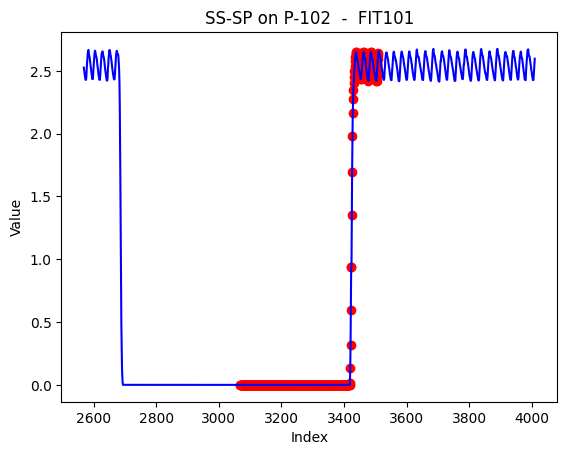

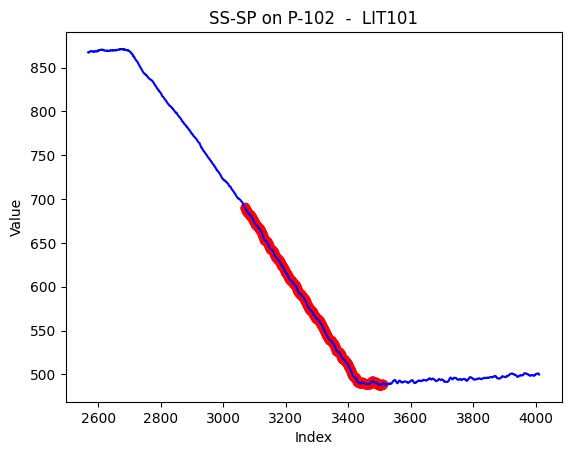

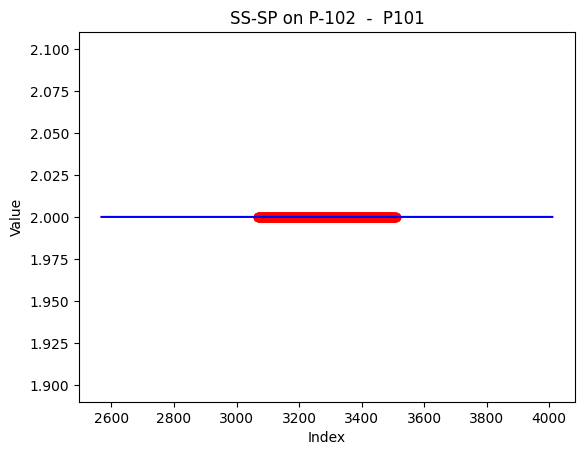

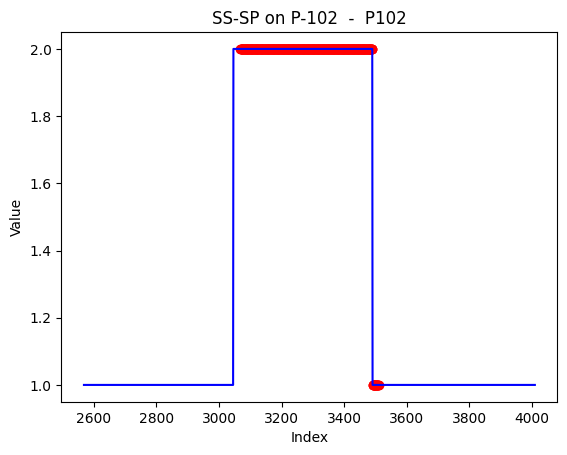

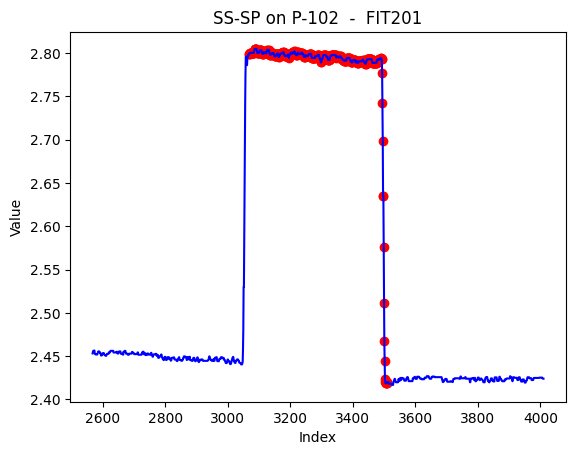

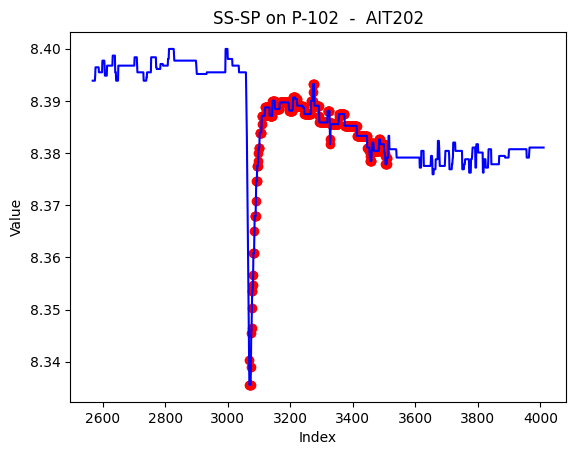

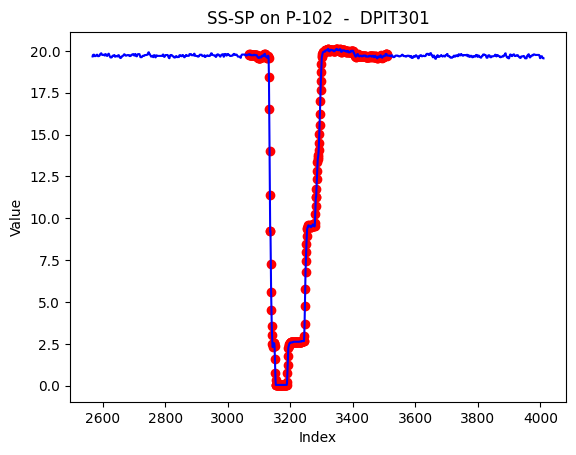

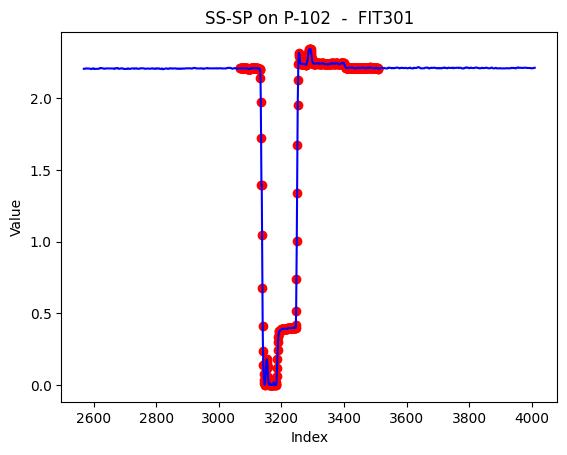

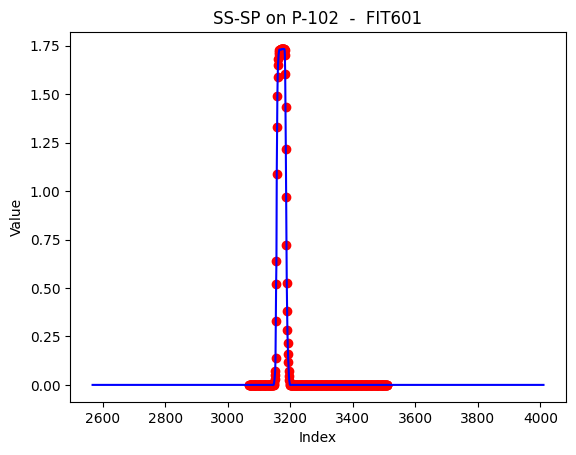

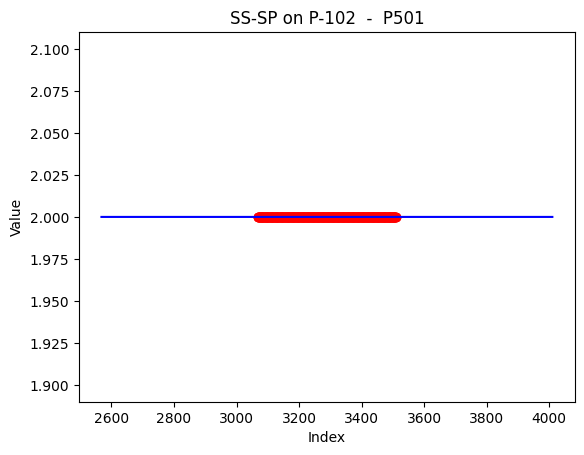

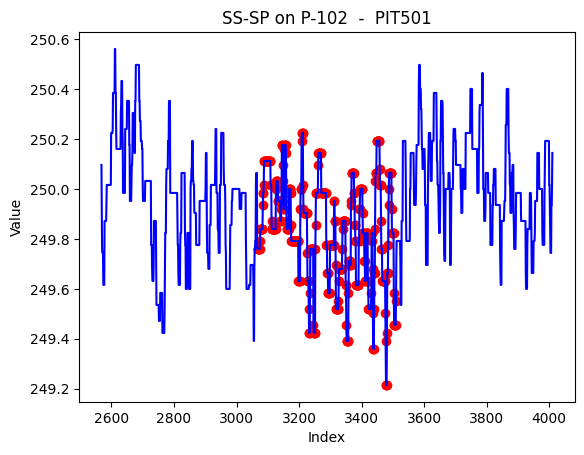

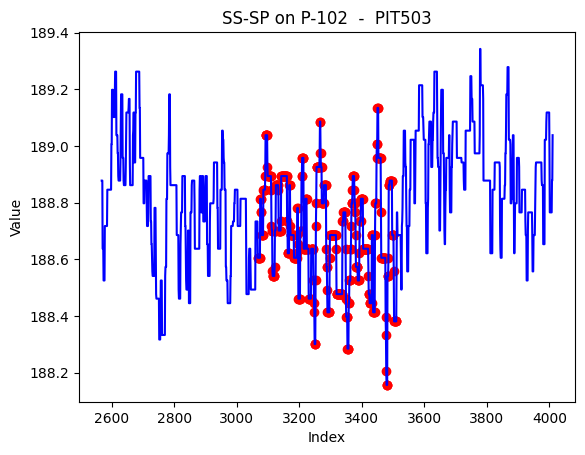

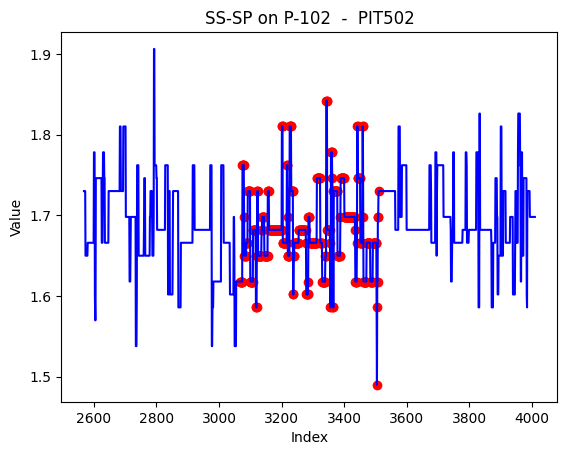

In [10]:
i = 0
bufferWidth = 500
print("Start: " + times["Start"][i] + "\tEnd: " + times["End"][i])
graphCols(df_attack, times["Type"][i], times["Start"][i], times["End"][i], bufferWidth)

In [11]:
for i in df_attack.select_dtypes('object').columns:
    le_attack = LabelEncoder().fit(df_attack[i])
    df_attack[i] = le.transform(df_attack[i])
X_scaler_attack = MinMaxScaler()
X_data_attack = X_scaler_attack.fit_transform(df_attack[['FIT101','LIT101','P101', 'P102', 'FIT201', 'AIT202', 'DPIT301', 'FIT301', 'FIT601', 'P501', 'PIT501', 'PIT503', 'PIT502']])

In [12]:
x_attack = []
y_attack = []

for i in range(0, len(X_data_attack) - 5):
    indices = range(i, i + 5)
    x_attack.append(X_data_attack[indices])
    indicey = range(i + 5, i + 1 + 5)
    y_attack.append(X_data_attack[i + 5])

In [13]:
x_attack = np.array(x_attack)
y_attack = np.array(y_attack)

In [17]:
model = model = keras.models.load_model("/content/drive/MyDrive/CI Project/MultiStage_Model")

In [18]:
y_attack_pred = model.predict(x_attack)

14060/14060 [==============================] - 36s 2ms/step


In [19]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    mse = metrics.mean_squared_error(y_true, y_pred)
    mae = metrics.mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_true, y_pred)

    print('Evaluation metric results:')
    print(f'MSE: {mse}')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print(f'R2: {r2}\n')

In [20]:
print("Normal data test set:")
timeseries_evaluation_metrics_func(y_attack, y_attack_pred)

print("Attack dataset:")
timeseries_evaluation_metrics_func(y_attack, y_attack_pred)

Normal data test set:
Evaluation metric results:
MSE: 0.0020903704176769688
MAE: 0.01853329982734824
RMSE: 0.04572056886869376
R2: 0.8506624630897763

Attack dataset:
Evaluation metric results:
MSE: 0.0020903704176769688
MAE: 0.01853329982734824
RMSE: 0.04572056886869376
R2: 0.8506624630897763



In [21]:
def showResiduals(title, start, end, buffer):
    window_start = start - buffer
    window_end = end + buffer
    window_size = 2 * buffer + (end - start)
    figure_list = []

    for i in range(0, 13):
        fig, ax = plt.subplots()  # Initialize the figure and axes
        residuals = y_attack[:, i] - y_attack_pred[:, i]
        x = list(range(window_start, window_end))

        ax.scatter(x, residuals[window_start:window_end])
        ax.axvline(x=start, color='g')
        ax.axvline(x=end, color='r')

        ax.set_title(title + "  -  " + df_attack.columns[i + 1] + " Residuals")
        ax.set_ylabel("Value")
        ax.legend(("Residuals", "Attack Start", "Attack End"))

        figure_list.append(fig)

    return figure_list

Start: 2015-12-28 10:51:08	End: 2015-12-28 10:58:30


[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>]

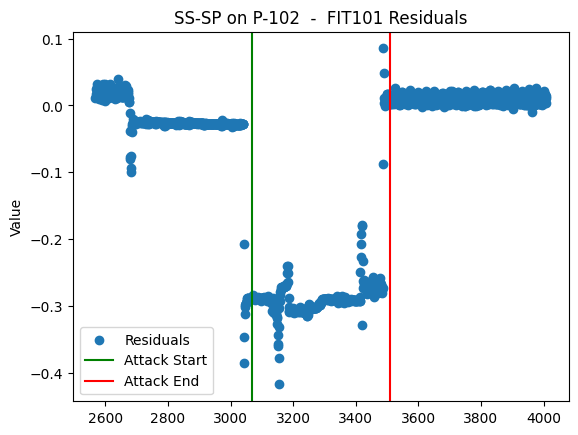

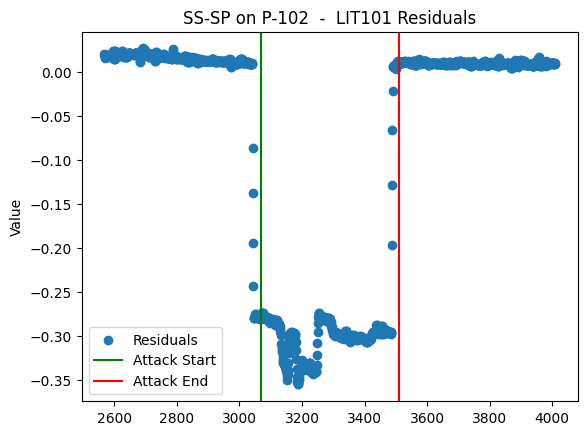

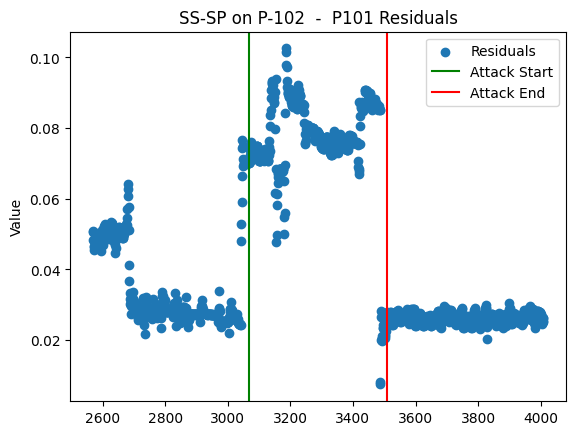

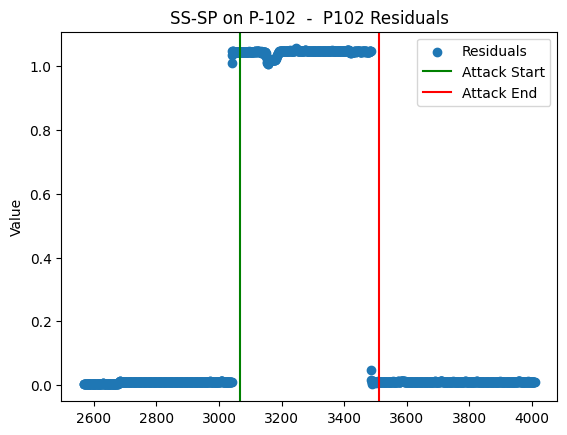

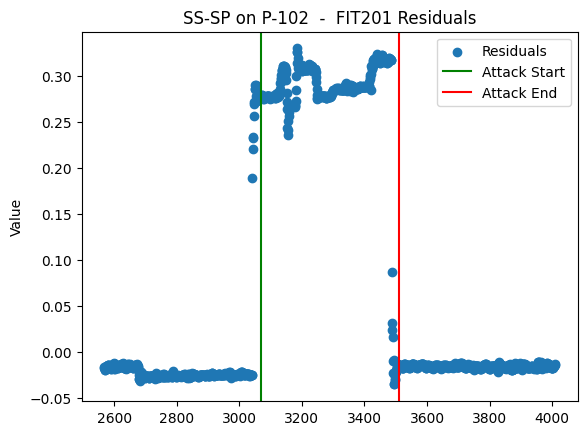

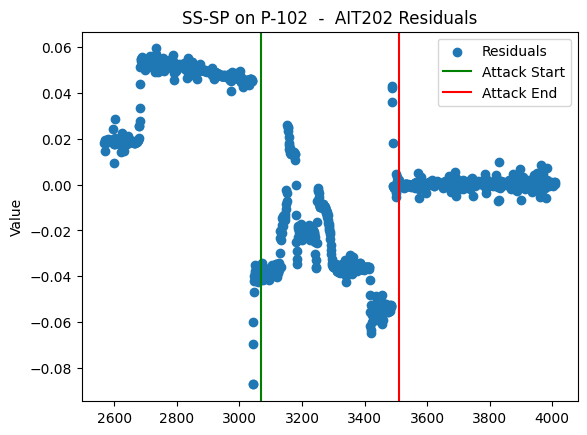

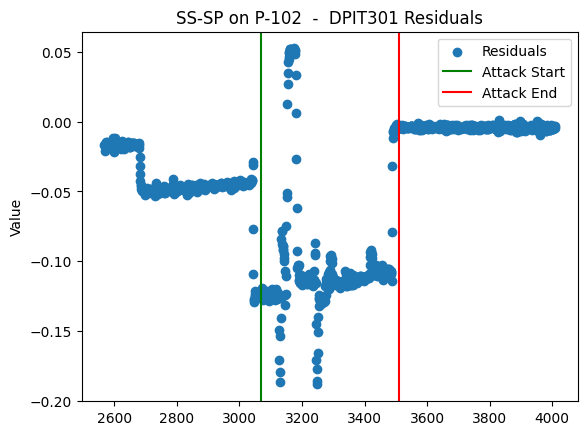

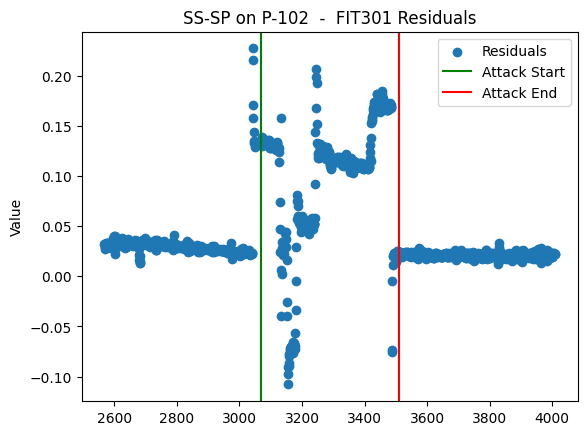

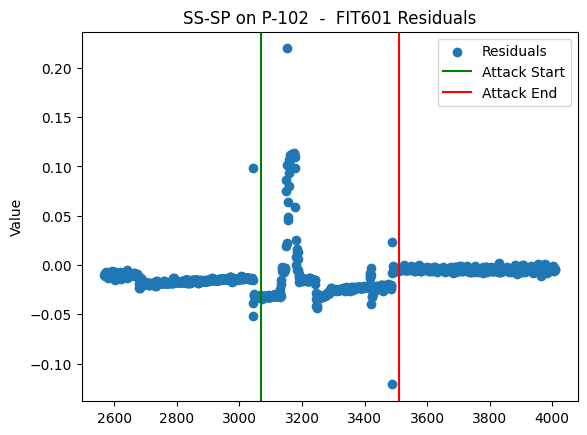

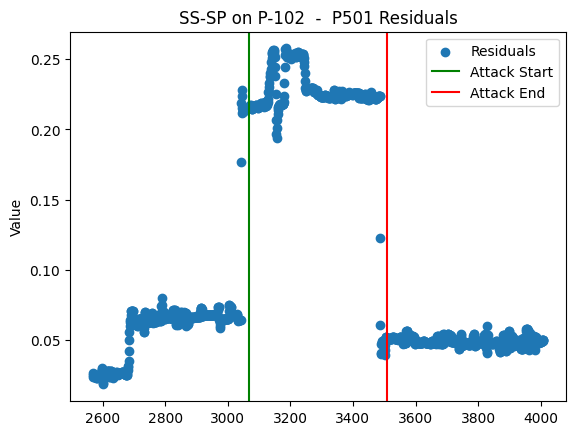

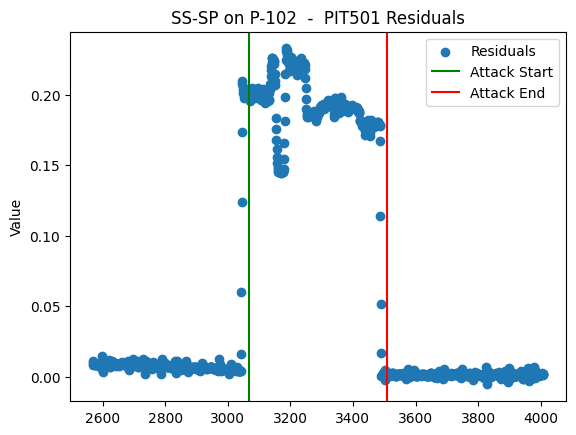

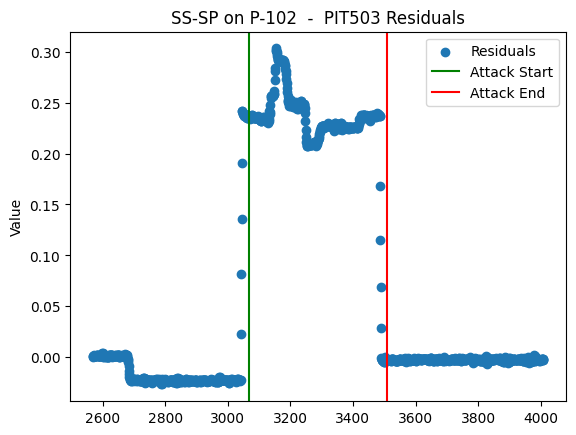

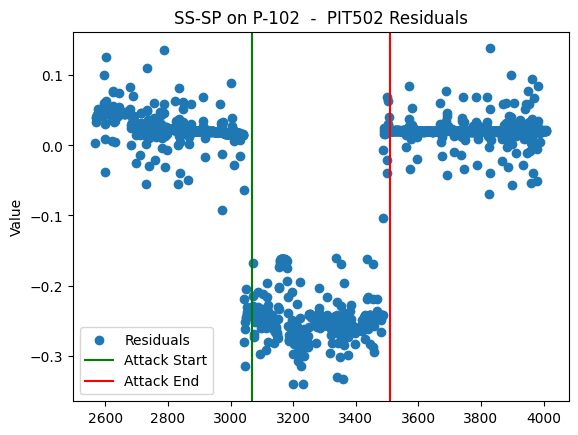

In [22]:
i = 0
bufferWidth = 500
print("Start: " + times["Start"][i] + "\tEnd: " + times["End"][i])
showResiduals(times["Type"][i], getTimeIndex(times["Start"][i]), getTimeIndex(times["End"][i]), bufferWidth)

In [24]:
titleN = "SWaT_Dataset_Normal_v0"
df_normal = pd.read_csv("/content/drive/MyDrive/CI Project/" + titleN + ".csv")

df_normal = df_normal[['FIT101','LIT101','P101', 'P102', 'FIT201', 'AIT202', 'DPIT301', 'FIT301', 'FIT601', 'P501', 'PIT501', 'PIT503', 'PIT502']]
print(df_normal.iloc[:5])

     FIT101    LIT101  P101  P102    FIT201   AIT202   DPIT301    FIT301  \
0  2.470294  261.5804     2     1  2.471278  8.19008  20.79839  2.235275   
1  2.457163  261.1879     2     1  2.468587  8.19008  20.79839  2.234507   
2  2.439548  260.9131     2     1  2.467305  8.19008  20.84320  2.233354   
3  2.428338  260.2850     2     1  2.466536  8.19008  20.84320  2.233354   
4  2.424815  259.8925     2     1  2.466536  8.19008  20.84320  2.233354   

     FIT601  P501    PIT501    PIT503  PIT502  
0  0.000256     1  10.02948  4.277749     0.0  
1  0.000256     1  10.02948  4.277749     0.0  
2  0.000256     1  10.02948  4.277749     0.0  
3  0.000256     1  10.02948  4.277749     0.0  
4  0.000256     1  10.02948  4.277749     0.0  


In [26]:
for i in df_normal.select_dtypes('object').columns:
    le_normal = LabelEncoder().fit(df_normal[i])
    df_normal[i] = le.transform(df_normal[i])
X_scaler_normal = MinMaxScaler()
X_data_normal = X_scaler_normal.fit_transform(df_normal[['FIT101','LIT101','P101', 'P102', 'FIT201', 'AIT202', 'DPIT301', 'FIT301', 'FIT601', 'P501', 'PIT501', 'PIT503', 'PIT502']])

In [27]:
x_normal = []
y_normal = []

for i in range(0, len(X_data_normal) - 5):
    indices = range(i, i + 5)
    x_normal.append(X_data_normal[indices])
    indicey = range(i + 5, i + 1 + 5)
    y_normal.append(X_data_normal[i + 5])

In [28]:
x_normal = np.array(x_normal)
y_normal = np.array(y_normal)

In [29]:
y_normal_pred = model.predict(x_normal)

15525/15525 [==============================] - 39s 3ms/step


In [30]:
def mergeResiduals(y, y_pred):
    residuals = y - y_pred
    merged_res = np.zeros(len(residuals))
    for i, timestep in enumerate(residuals):
        sum_of_squares = sum(x ** 2 for x in timestep)
        merged_res[i] = sum_of_squares
    return merged_res

In [31]:
normalResiduals = mergeResiduals(y_normal, y_normal_pred)
thresholdVal = 5 * np.std(normalResiduals)

print(thresholdVal)

0.11122785795110897


In [33]:
def getCusum(title, start, end, buffer, threshold):
    residuals = mergeResiduals(y_attack, y_attack_pred)
    residuals = residuals[start - buffer:end + buffer]

    cusum_abs = np.cumsum(np.abs(residuals))  # Calculate absolute CUSUM values

    x = np.arange(start - buffer, end + buffer)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x, cusum_abs[:len(x)], 'b-', label='Absolute CUSUM')
    ax.axhline(threshold, color='b', linestyle='--', label='Threshold')
    ax.axvline(x=start, color='g', linestyle='--', label='Attack Start')
    ax.axvline(x=end, color='r', linestyle='--', label='Attack End')
    ax.set_title(title + '  -  CUSUM')
    ax.set_xlabel('Time')
    ax.set_ylabel('CUSUM')
    ax.legend()
    ax.grid(True)

    plt.close(fig)  # Close the figure to avoid displaying it

    return fig

Start: 2015-12-28 10:51:08	End: 2015-12-28 10:58:30


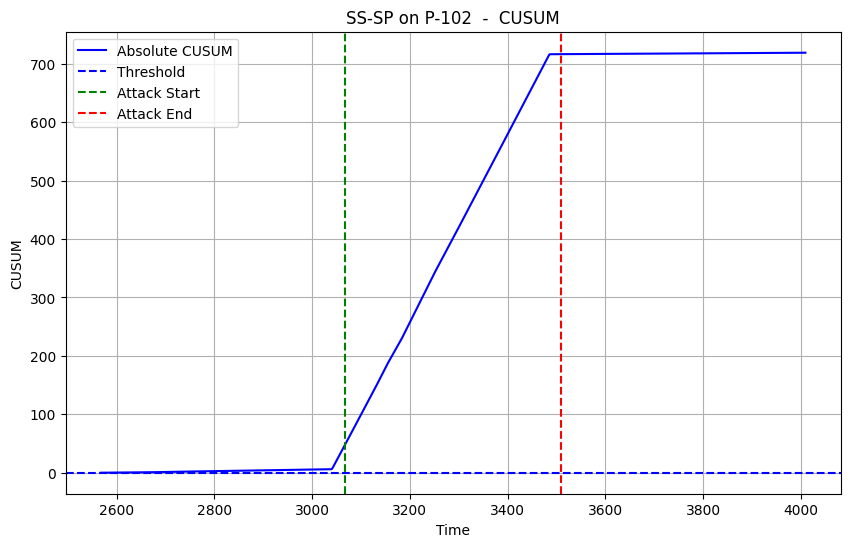

In [34]:
i = 0
bufferWidth = 500
print("Start: " + times["Start"][i] + "\tEnd: " + times["End"][i])
getCusum(times['Type'][i],  getTimeIndex(times["Start"][i]), getTimeIndex(times["End"][i]), bufferWidth, thresholdVal)

In [36]:
def intervalAnalysis(intervals, attackIndex, buffer, threshold):
  intType =  intervals["Type"][i]
  intStart = intervals["Start"][i]
  intEnd = intervals["End"][i]

  print("Start: " + intStart + "\tEnd: " + intEnd)

  graphCols(df_attack, intType, intStart, intEnd, buffer)
  showResiduals(intType, getTimeIndex(intStart), getTimeIndex(intEnd), buffer)
  getCusum(intType,  getTimeIndex(intStart), getTimeIndex(intEnd), buffer, threshold)

Start: 2015-12-28 10:51:08	End: 2015-12-28 10:58:30


<ipython-input-21-f89eff285797>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()  # Initialize the figure and axes


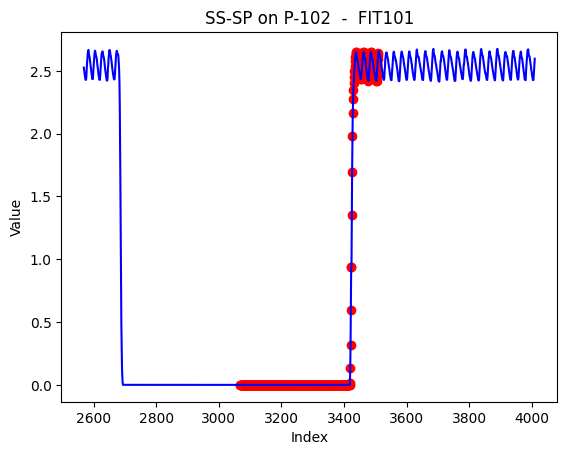

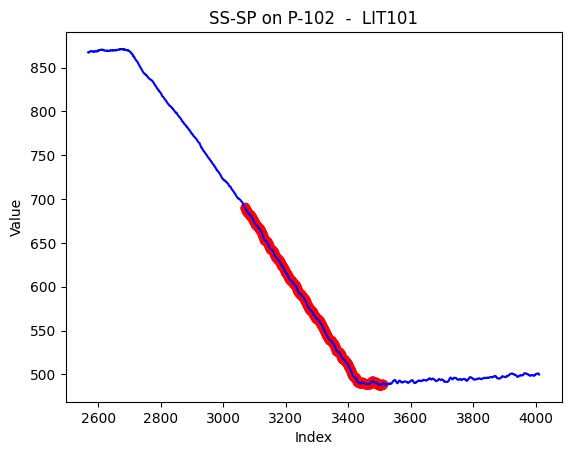

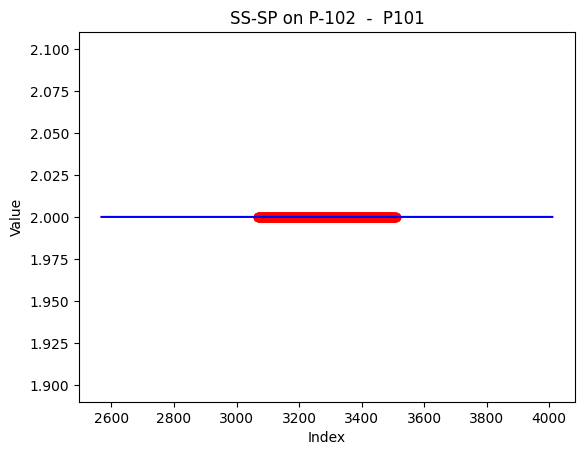

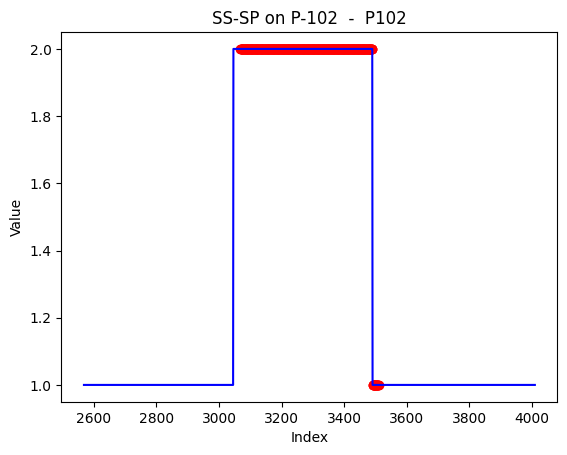

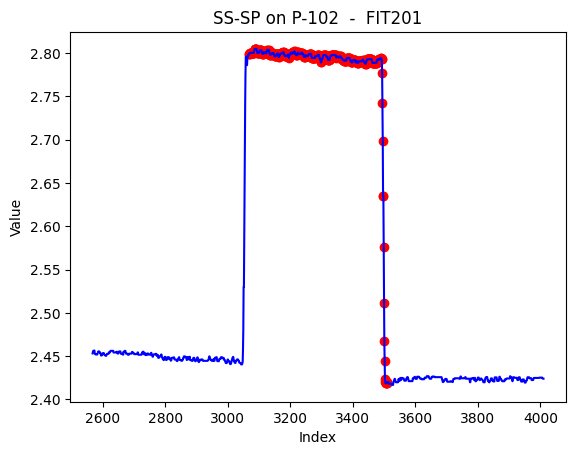

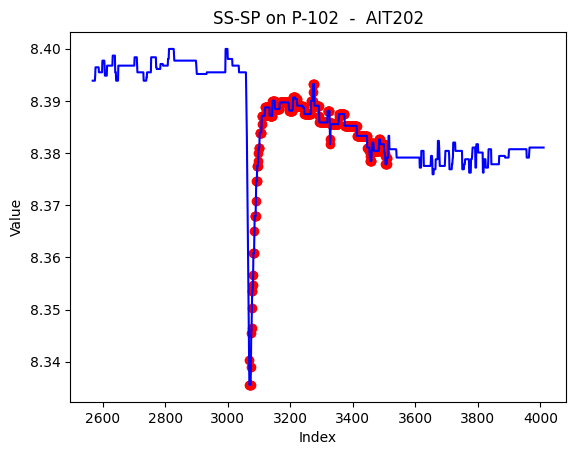

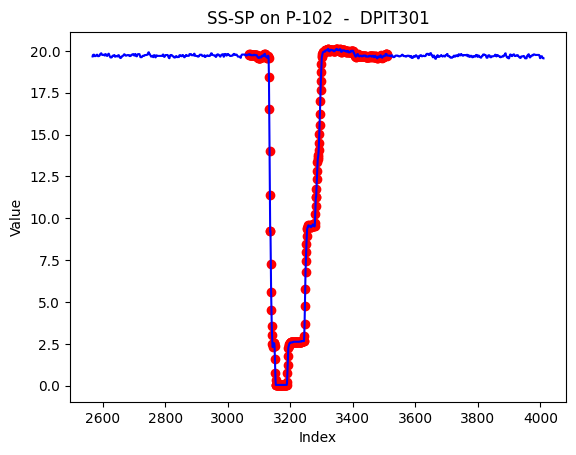

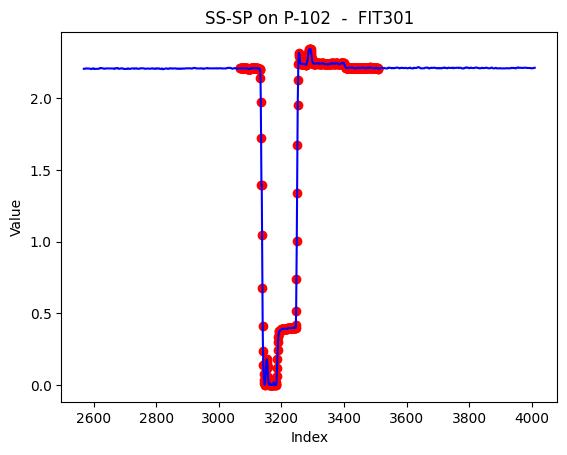

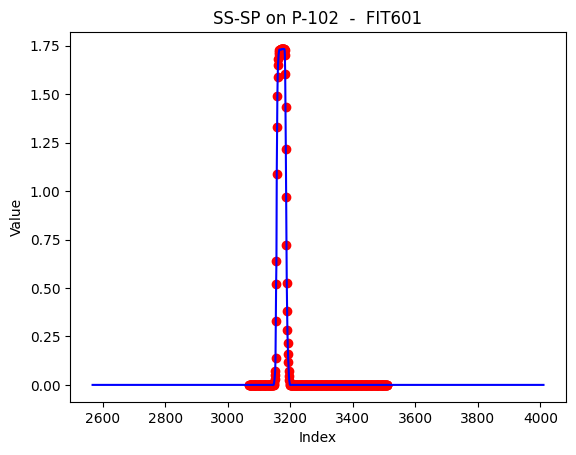

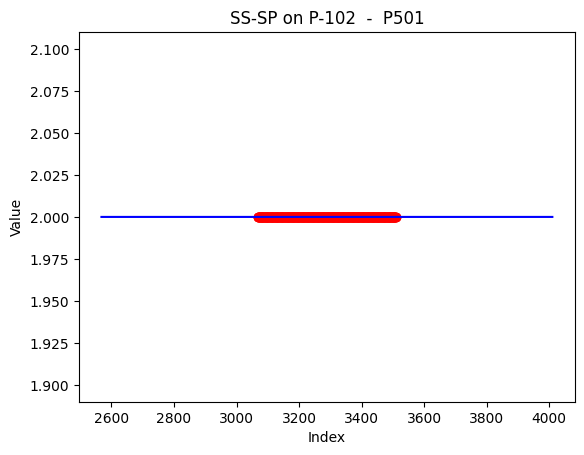

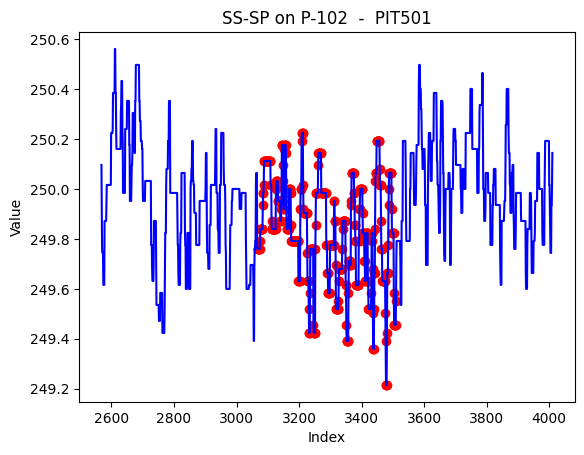

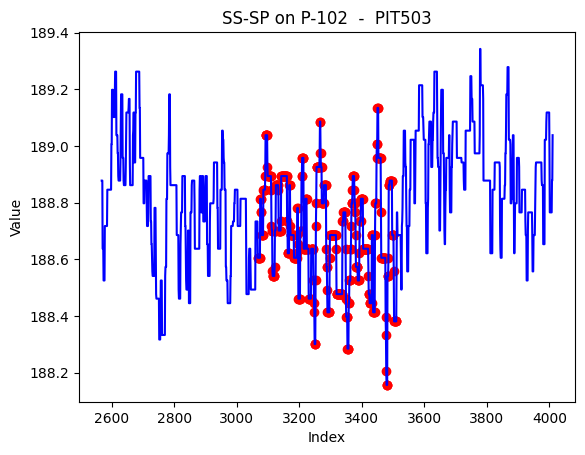

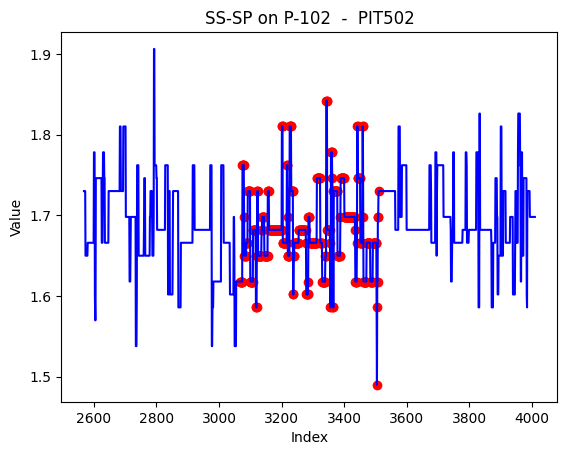

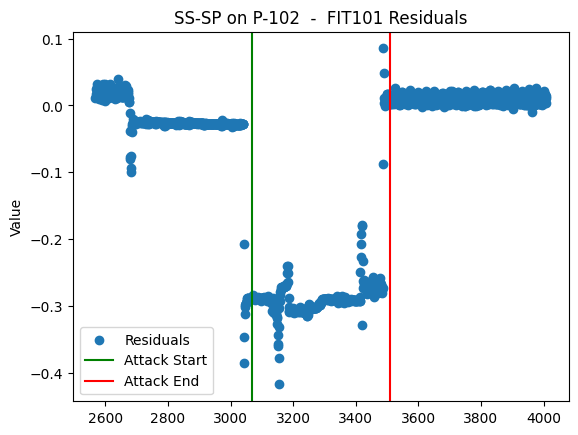

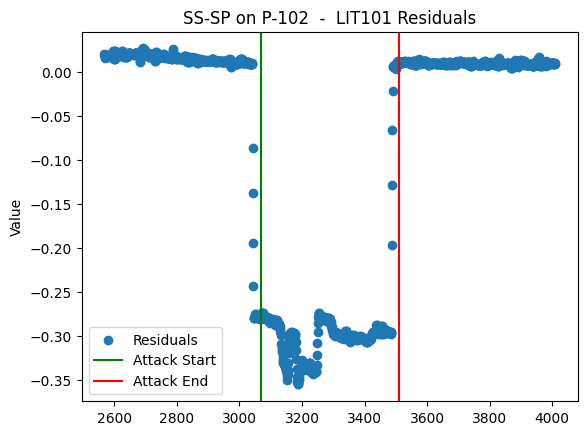

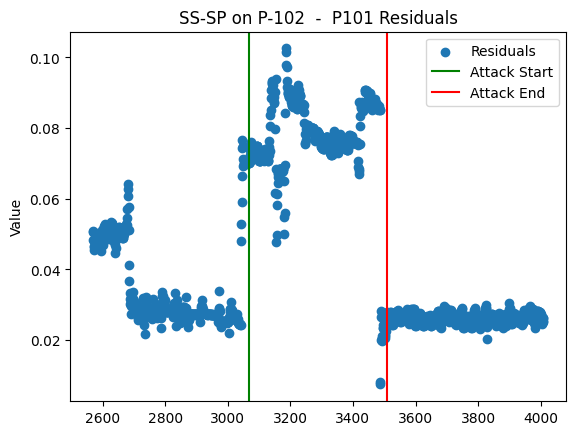

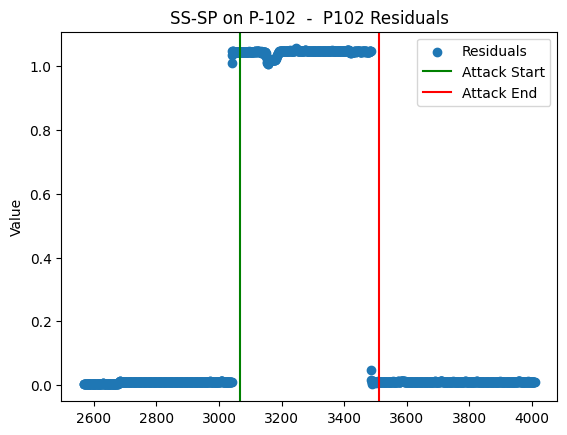

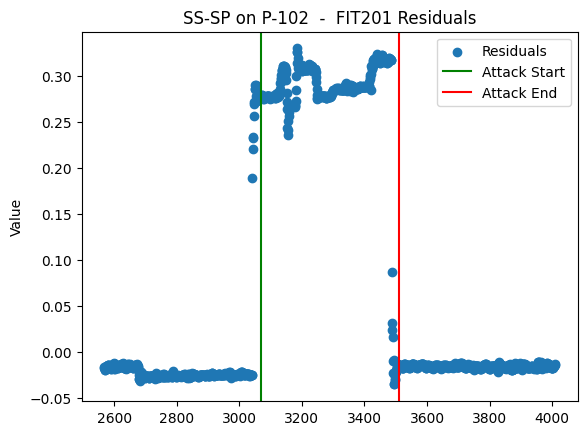

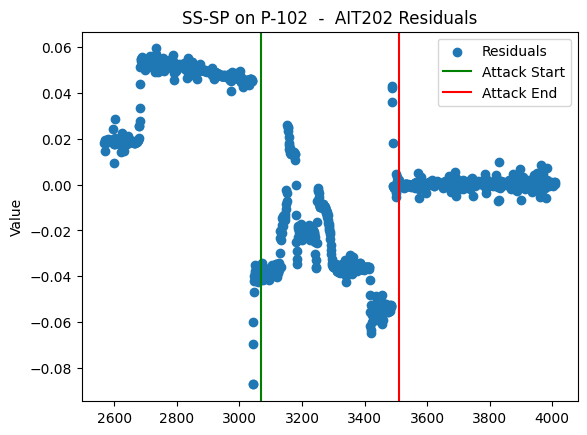

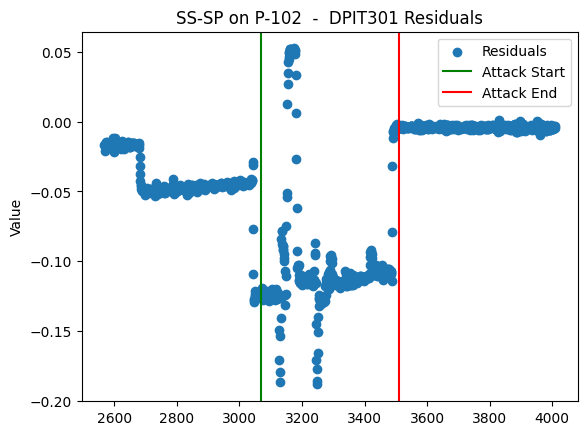

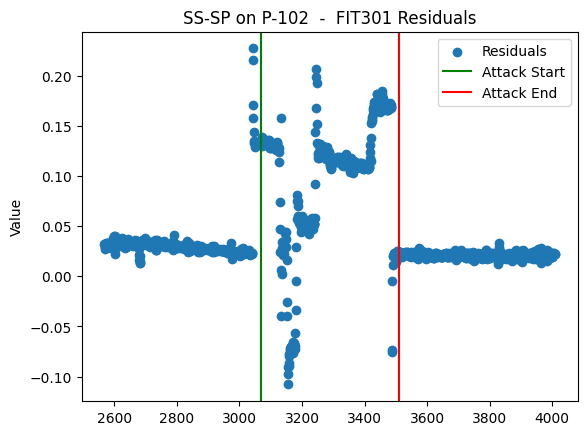

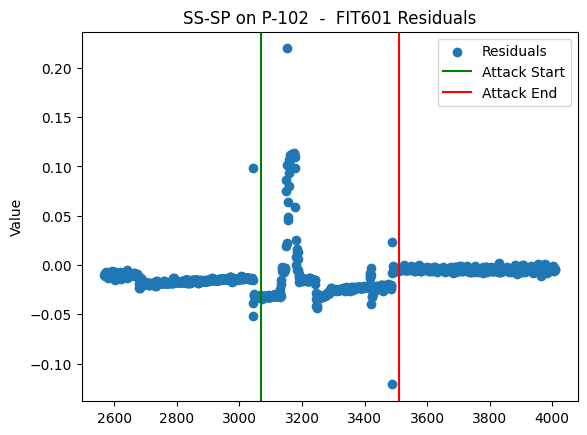

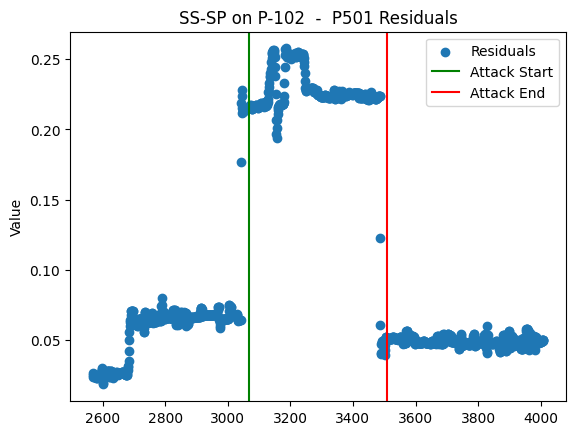

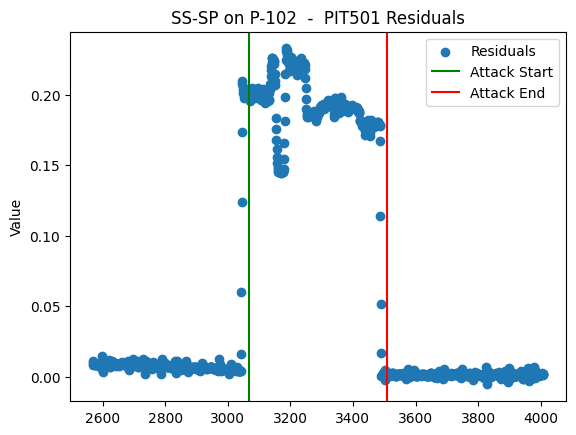

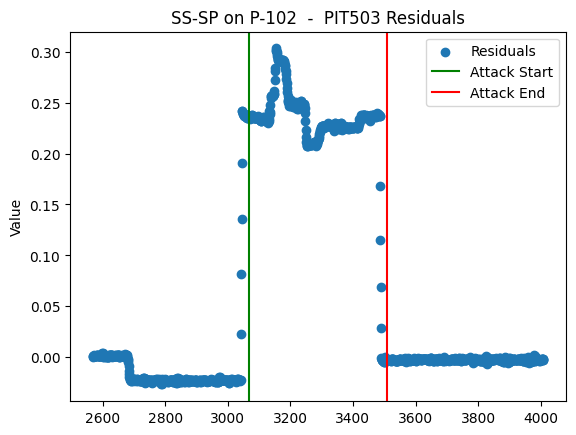

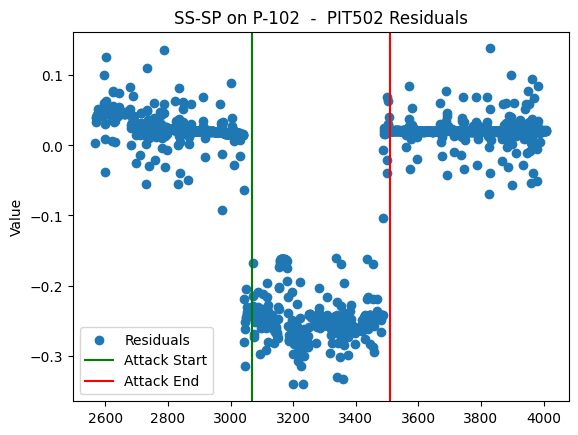

In [37]:
intervalAnalysis(times, 0, 500, thresholdVal)

Start: 2015-12-28 10:00:30	End: 2015-12-28 10:13:30


<ipython-input-21-f89eff285797>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()  # Initialize the figure and axes


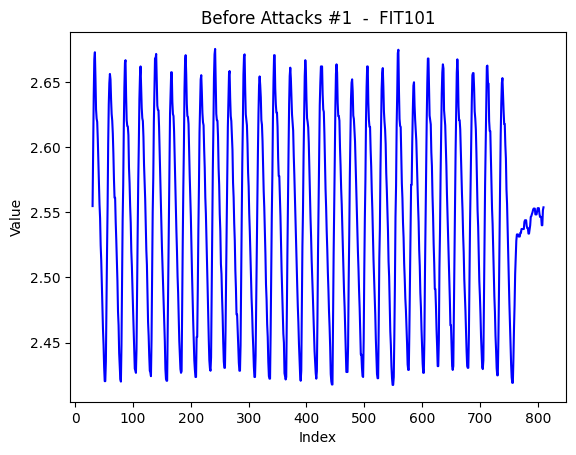

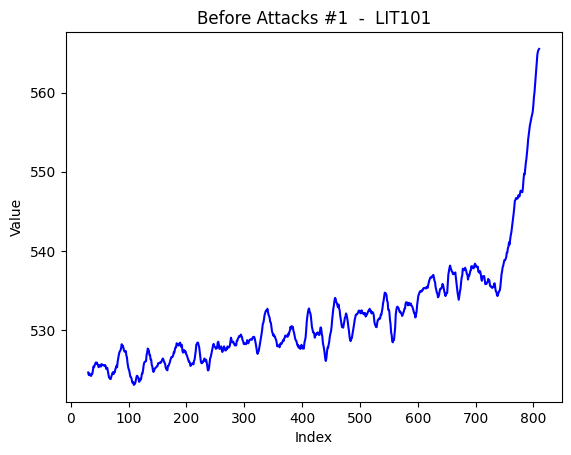

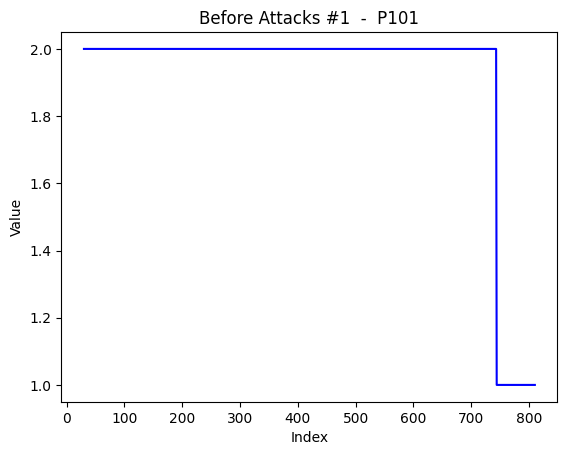

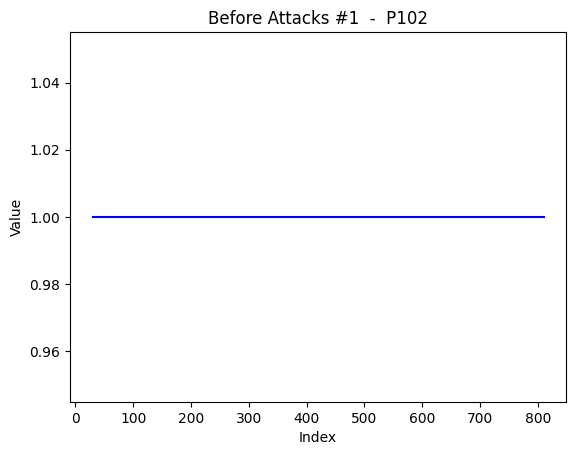

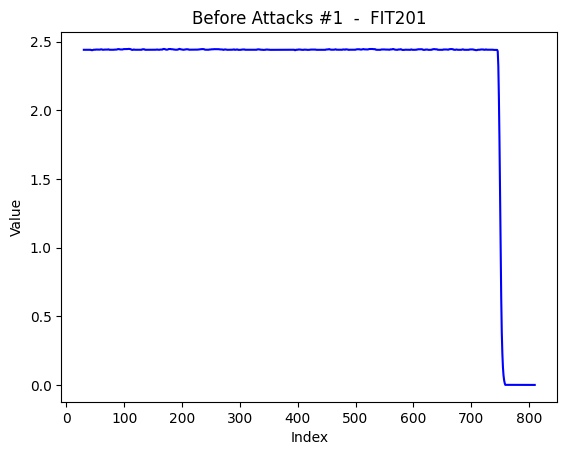

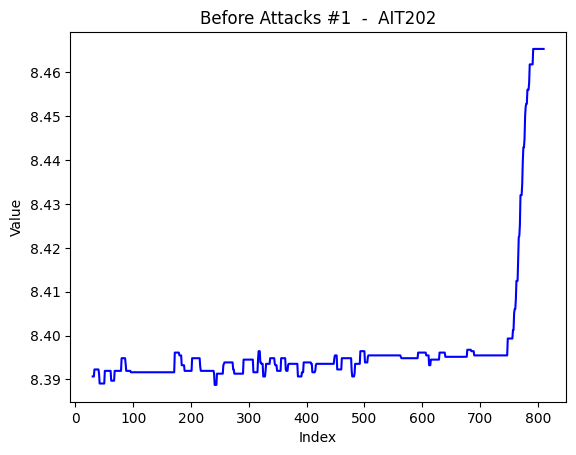

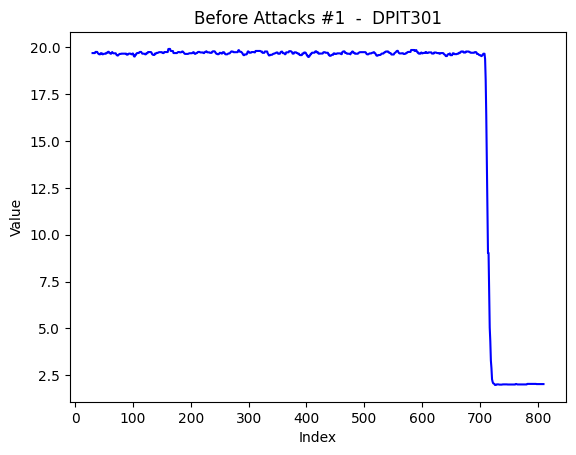

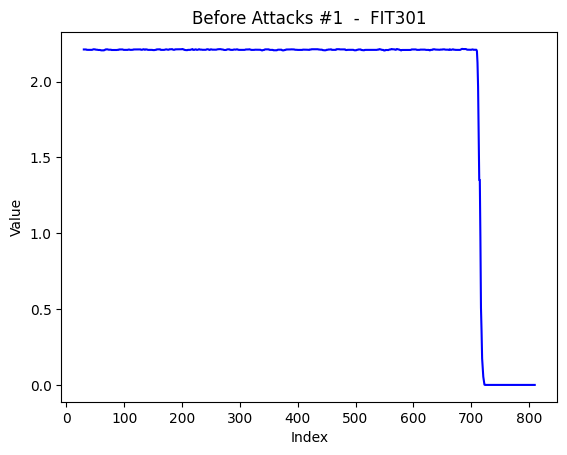

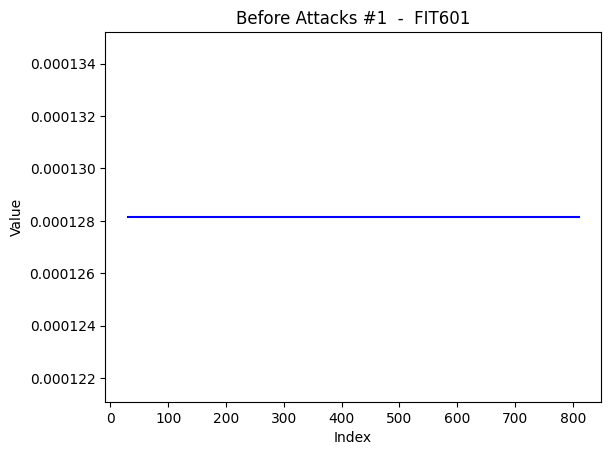

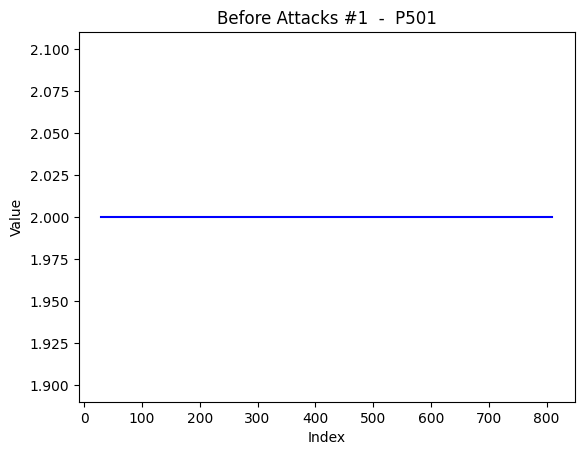

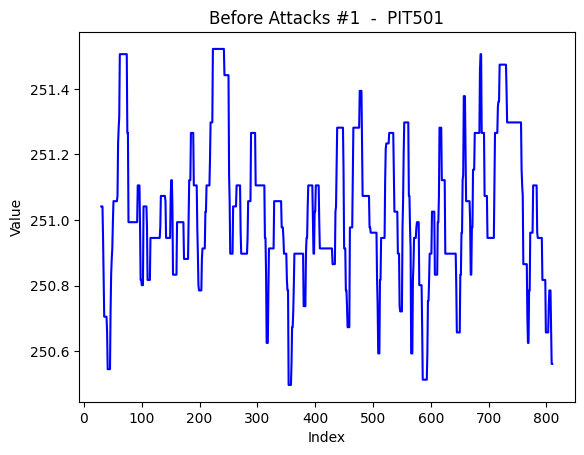

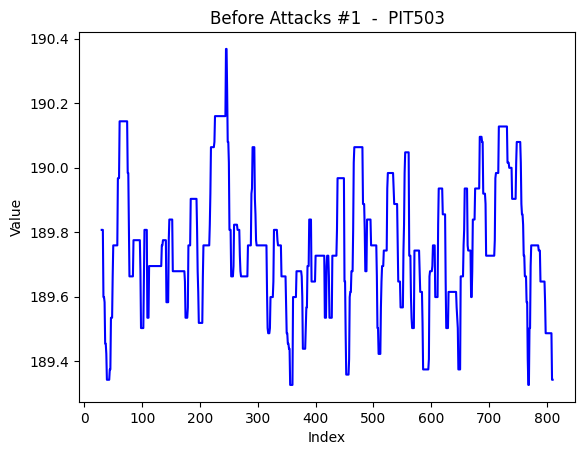

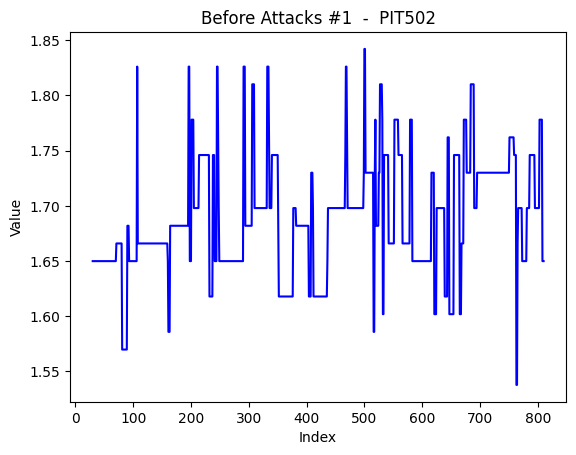

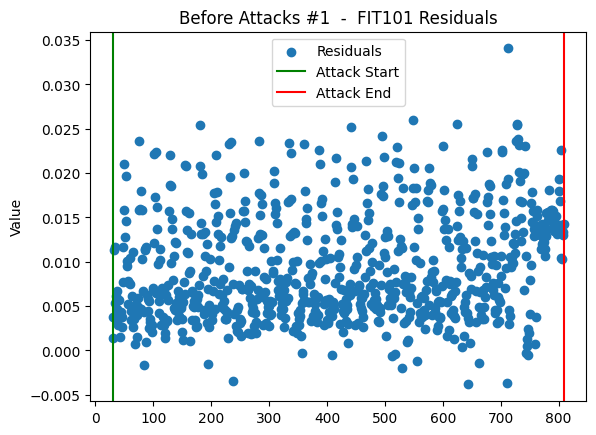

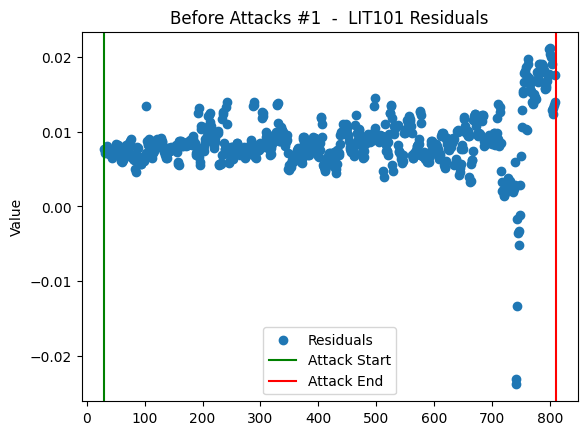

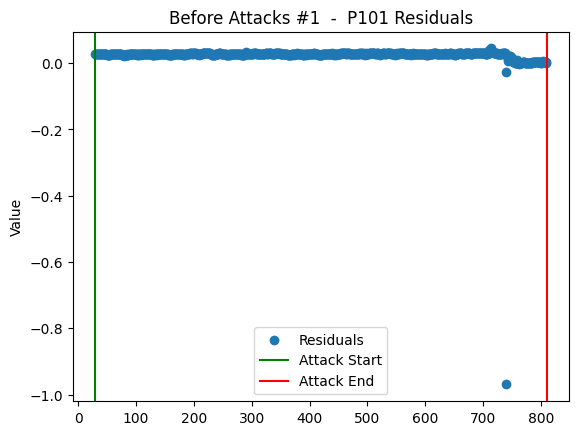

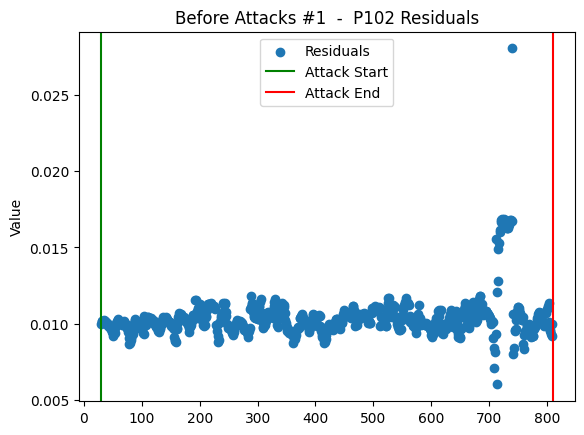

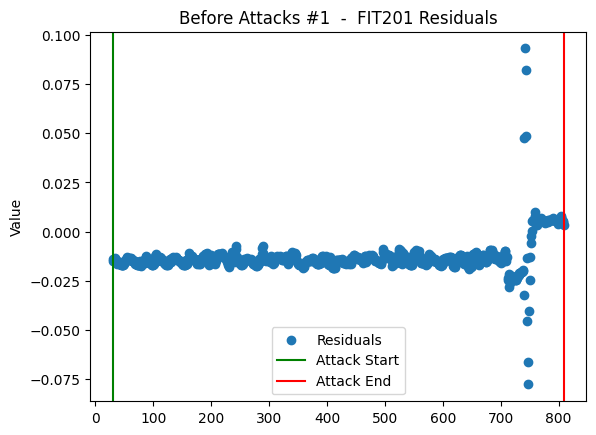

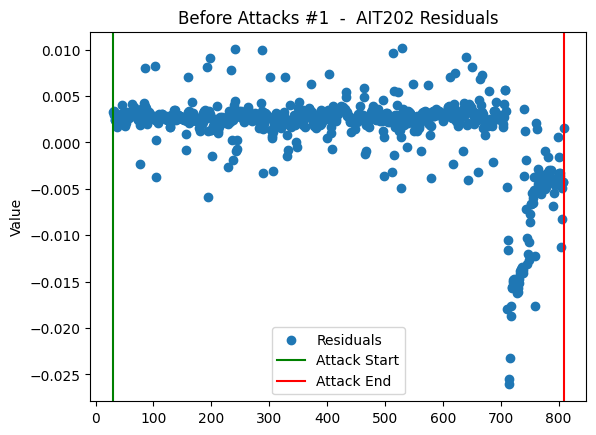

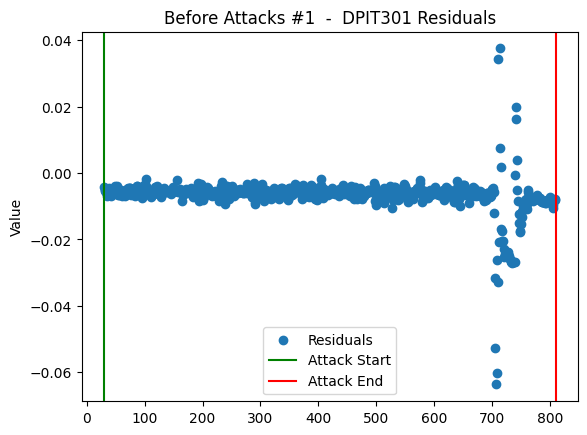

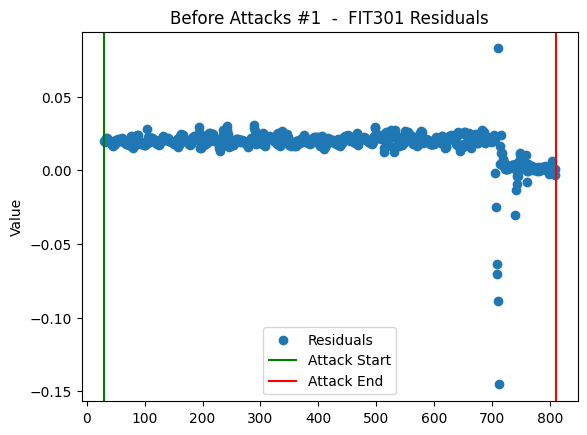

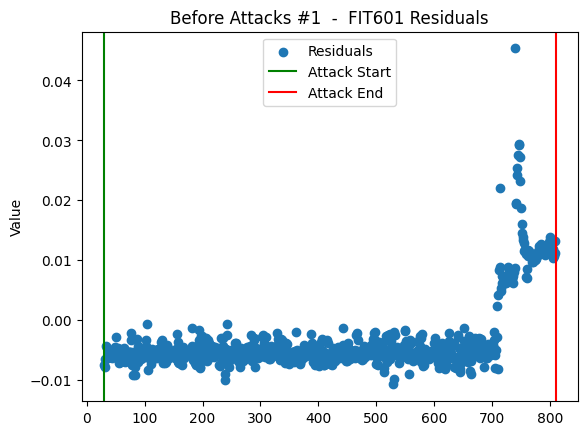

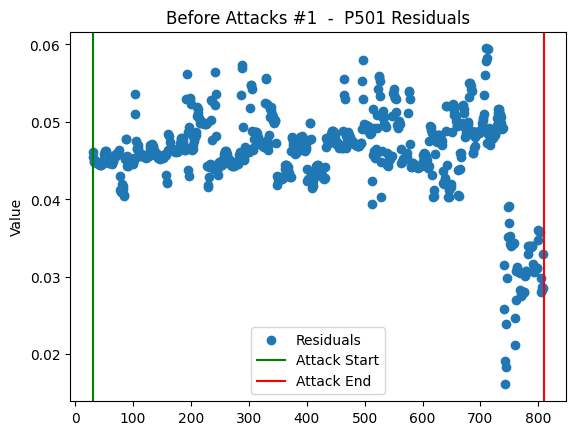

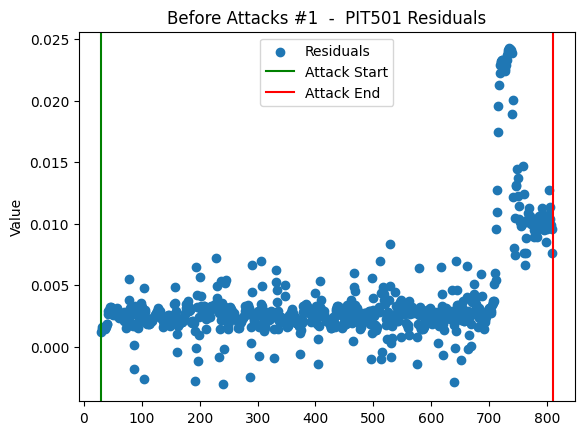

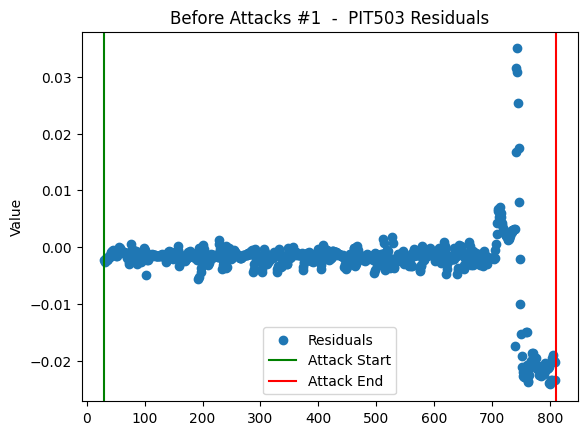

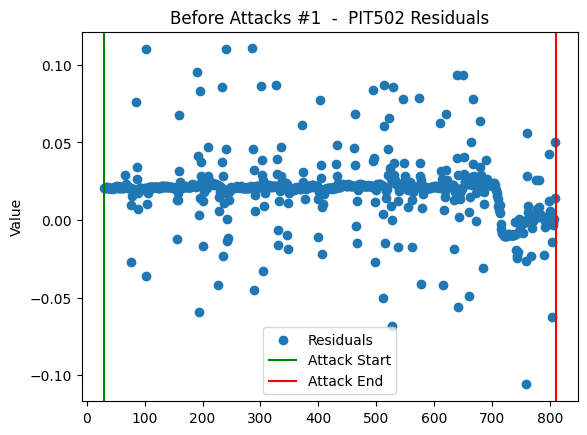

In [38]:
intervalAnalysis(non_attack, 0, 0, thresholdVal)

In [40]:
def generatePDF(intervals, buffer, threshold, title):
    # Create a PDF object
    pdf = pdf_backend.PdfPages(title + '.pdf')

    for i in range(len(intervals["Type"])):
        intType = intervals["Type"][i]
        intStart = intervals["Start"][i]
        intEnd = intervals["End"][i]

        print("Start: " + intStart + "\tEnd: " + intEnd)

        # Call the four functions to generate the figures
        graph_cols_figures = graphCols(df_attack, intType, intStart, intEnd, buffer)
        show_residuals_figures = showResiduals(intType, getTimeIndex(intStart), getTimeIndex(intEnd), buffer)
        cusum_figure = getCusum(intType, getTimeIndex(intStart), getTimeIndex(intEnd), buffer, threshold)

        # Save the figures to the PDF
        for figure in graph_cols_figures:
            pdf.savefig(figure)
            plt.close(figure)

        for figure in show_residuals_figures:
            pdf.savefig(figure)
            plt.close(figure)

        pdf.savefig(cusum_figure)
        plt.close(cusum_figure)

    # Close the PDF file
    pdf.close()

In [41]:
generatePDF(times, 500, thresholdVal, "Multistage_Attack")

Start: 2015-12-28 10:51:08	End: 2015-12-28 10:58:30


<ipython-input-21-f89eff285797>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()  # Initialize the figure and axes


Start: 2015-12-28 11:47:39	End: 2015-12-28 11:54:08
Start: 2015-12-28 13:10:10	End: 2015-12-28 13:26:13
Start: 2015-12-29 18:30:00	End: 2015-12-29 18:42:00
Start: 2015-12-31 15:32:00	End: 2015-12-31 15:34:00
Start: 2015-12-29 17:04:56	End: 2015-12-29 17:29:00
Start: 2015-12-31 01:17:08	End: 2015-12-31 01:45:18
Start: 2015-12-30 01:42:34	End: 2015-12-30 01:54:10
Start: 2015-12-31 15:47:40	End: 2015-12-31 16:07:10


In [42]:
generatePDF(non_attack, 0, thresholdVal, "Multistage_Non_Attack")

Start: 2015-12-28 10:00:30	End: 2015-12-28 10:13:30


<ipython-input-21-f89eff285797>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()  # Initialize the figure and axes


Start: 2015-12-28 10:14:00	End: 2015-12-28 10:27:00
Start: 2015-12-28 14:02:00	End: 2015-12-28 14:15:00
Start: 2015-12-29 15:10:00	End: 2015-12-29 15:23:00
Start: 2015-12-30 13:00:00	End: 2015-12-30 13:13:00
Start: 2015-12-31 16:20:00	End: 2015-12-31 16:33:00


In [45]:
times["Indicator"] = [1] * len(times["Type"])
non_attack["Indicator"] = [0] * len(times["Type"])

intervals = {key: times[key] + non_attack[key] for key in times}

In [46]:
def detectAnomalies(intervals, threshold):
    anomaly_dict = {}
    residuals = np.abs(y_attack - y_attack_pred)
    mean = np.mean(residuals)
    std = np.std(residuals)
    results = []

    truePositive = 0  # 1 | 1
    falsePositive = 0  # 0 | 1
    falseNegative = 0  # 1 | 0
    trueNegative = 0  # 0 | 0

    for i in range(len(intervals["Type"])):
        intType = intervals["Type"][i]
        intStart = intervals["Start"][i]
        intEnd = intervals["End"][i]
        indicator = intervals["Indicator"][i]

        start_idx = getTimeIndex(intStart)
        end_idx = getTimeIndex(intEnd)

        if np.any(residuals[start_idx:end_idx] > threshold):
            if indicator == 1:
                truePositive += 1
                anomaly_dict[intType] = "A:1 | P:1 - True Positive\n\t Detected Abnormal Behavior During an Attack"
            else:
                falsePositive += 1
                anomaly_dict[intType] = "A:0 | P:1 - False Positive\n\t Detected Abnormal Behavior During Normal Operation"
        else:
            if indicator == 0:
                trueNegative += 1
                anomaly_dict[intType] = "A:0 | P:0 - True Negative\n\t Detected Normal Behavior During Normal Operation"
            else:
                falseNegative += 1
                anomaly_dict[intType] = "A:1 | P:0 - False Negative\n\t Detected Normal Behavior During an Attack"

    results.append(truePositive)
    results.append(falsePositive)
    results.append(falseNegative)
    results.append(trueNegative)

    return anomaly_dict, results

In [47]:
# Get the anomaly detection results for each interval
anomaly_results, values = detectAnomalies(intervals, thresholdVal)

# Print the number of entries for each interval type
for key, value in anomaly_results.items():
    print(key, "\n\t", value, "\n")

SS-SP on P-102 
	 A:1 | P:1 - True Positive
	 Detected Abnormal Behavior During an Attack 

SS-SP on MV-504 
	 A:1 | P:1 - True Positive
	 Detected Abnormal Behavior During an Attack 

SS-SP on DPIT-301 
	 A:1 | P:1 - True Positive
	 Detected Abnormal Behavior During an Attack 

SS-MP on MV-101, LIT-101 
	 A:1 | P:1 - True Positive
	 Detected Abnormal Behavior During an Attack 

SS-MP on P-201, P-203, P-205 
	 A:1 | P:0 - False Negative
	 Detected Normal Behavior During an Attack 

MS-SP on P-101, LIT-301 
	 A:1 | P:0 - False Negative
	 Detected Normal Behavior During an Attack 

MS-SP on P-302, LIT-401 
	 A:1 | P:0 - False Negative
	 Detected Normal Behavior During an Attack 

MS-MP on P-602, DIT-301, MV-302 
	 A:1 | P:1 - True Positive
	 Detected Abnormal Behavior During an Attack 

MS-MP on LIT-101, P-101, MV-201 
	 A:1 | P:1 - True Positive
	 Detected Abnormal Behavior During an Attack 

Before Attacks #1 
	 A:0 | P:1 - False Positive
	 Detected Abnormal Behavior During Normal Oper

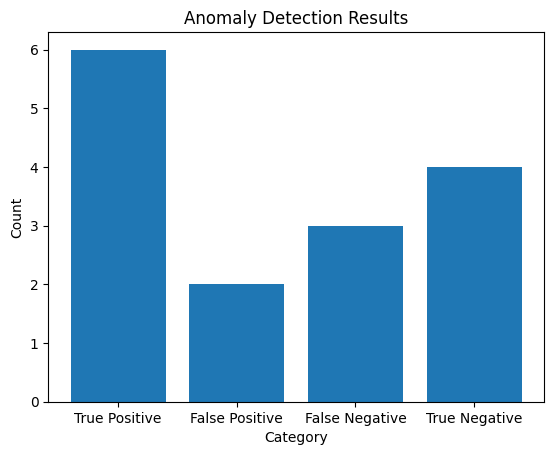

In [48]:
labels = ['True Positive', 'False Positive', 'False Negative', 'True Negative']
plt.bar(labels, values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Anomaly Detection Results')
plt.show()